<a href="https://colab.research.google.com/github/lnrdmnc/Model-prediction-for-terrorist-attacks-IA/blob/main/Model_prediction_for_terrorist_attacks_IA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Ottenimento del Dataset**



Dopo aver scaricato il dataset dal  [Global Terrorism Database](https://www.kaggle.com/datasets/START-UMD/gtd) e aver eliminato le informazioni inerenti agli attacchi terroristici raccolte dal 1970 fino al 2015 e le informazioni post 2015. 
Il dataset è pronto.

In [17]:
import pandas as pd
import os
import matplotlib.pyplot as plt
from six.moves import urllib
import seaborn as sb
from matplotlib import style
from google.colab import files
import io
style.use('seaborn-whitegrid')
plt.rcParams['figure.figsize'] = (40,20)
gtd=pd.read_csv('globalterrorism2015.csv',encoding="ISO-8859-1")
gtd.head(3)

,Year,Month,Day,Country,Region,city,latitude,longitude,AttackType,Killed,Wounded,Target,Summary,Group,Target_type,Weapon_type,Motive
0,2015,1,3,Iraq,Middle East & North Africa,Baghdad,33.303566,44.371773,Bombing/Explosion,2.0,5.0,Minibus,01/03/2015: An explosive device planted on a m...,Unknown,Private Citizens & Property,Explosives,NaN
1,2015,1,1,Bosnia-Herzegovina,Eastern Europe,Trnovi,45.183961,15.828342,Armed Assault,0.0,1.0,Imam: Selvedin Beganovic,01/01/2015: Assailants stabbed Selvedin Begano...,Muslim extremists,Religious Figures/Institutions,Melee,"The specific motive is unknown; however, sourc..."
2,2015,1,1,Iraq,Middle East & North Africa,Baghdad,33.303566,44.371773,Bombing/Explosion,1.0,1.0,Lecturer,01/01/2015: An explosive device planted in a v...,Unknown,Educational Institution,Explosives,NaN


**Ottenimento del Dataset World Happiness Report**


Dopo un accurata scelta ho preferito scegliere tra l'anno 2015,2016,2017.
E' stato scelto l'anno 2015 in base all'attacco terroristico che ci fù al concerto di Ariana Grande a Manchester.
Il dataset è il [seguente](https://www.kaggle.com/datasets/unsdsn/world-happiness?resource=download)

In [4]:
from numpy.core.multiarray import where
import pandas as pd
import os
import matplotlib.pyplot as plt
from six.moves import urllib
import seaborn as sb
from matplotlib import style
from google.colab import files
import io
whp=pd.read_csv('2015.csv')
whp.head(3)


,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204


**Merge dei due Dataset**


Dopo aver reperito i due dataset siamo giunti al momento in cui dobbiamo unire i due dataset per creare un unico Dataset che contenga sia i dati sugli attacchi terroristici e sia i report sulla felicità nell'anno 2015.

In [5]:
merge=pd.merge(left=gtd, right=whp, how='inner', on="Country")
print(merge)
merge.to_csv("terrorism2015WHR.csv",index=False)
merge.head(10)

       Year  Month  Day     Country                    Region_x         city  \
0      2015      1    3        Iraq  Middle East & North Africa      Baghdad   
1      2015      1    1        Iraq  Middle East & North Africa      Baghdad   
2      2015      1    1        Iraq  Middle East & North Africa      Baghdad   
3      2015      1    1        Iraq  Middle East & North Africa      Baghdad   
4      2015      1    1        Iraq  Middle East & North Africa      Baghdad   
...     ...    ...  ...         ...                         ...          ...   
12678  2015     11    7  Tajikistan                Central Asia     Dushanbe   
12679  2015      9   24     Finland              Western Europe  Keltakangas   
12680  2015     10    7     Finland              Western Europe        Lammi   
12681  2015      9   28  Uzbekistan                Central Asia     Tashkent   
12682  2015     11    5     Morocco  Middle East & North Africa   Casablanca   

        latitude  longitude            

,Year,Month,Day,Country,Region_x,city,latitude,longitude,AttackType,Killed,...,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,2015,1,3,Iraq,Middle East & North Africa,Baghdad,33.303566,44.371773,Bombing/Explosion,2.0,...,112,4.677,0.05232,0.98549,0.81889,0.60237,0.0,0.13788,0.17922,1.95335
1,2015,1,1,Iraq,Middle East & North Africa,Baghdad,33.303566,44.371773,Bombing/Explosion,1.0,...,112,4.677,0.05232,0.98549,0.81889,0.60237,0.0,0.13788,0.17922,1.95335
2,2015,1,1,Iraq,Middle East & North Africa,Baghdad,33.303566,44.371773,Bombing/Explosion,3.0,...,112,4.677,0.05232,0.98549,0.81889,0.60237,0.0,0.13788,0.17922,1.95335
3,2015,1,1,Iraq,Middle East & North Africa,Baghdad,33.303566,44.371773,Bombing/Explosion,1.0,...,112,4.677,0.05232,0.98549,0.81889,0.60237,0.0,0.13788,0.17922,1.95335
4,2015,1,1,Iraq,Middle East & North Africa,Baghdad,33.303566,44.371773,Bombing/Explosion,1.0,...,112,4.677,0.05232,0.98549,0.81889,0.60237,0.0,0.13788,0.17922,1.95335
5,2015,1,1,Iraq,Middle East & North Africa,Mahmudiyah,33.057991,44.354839,Bombing/Explosion,2.0,...,112,4.677,0.05232,0.98549,0.81889,0.60237,0.0,0.13788,0.17922,1.95335
6,2015,1,1,Iraq,Middle East & North Africa,Tayaran,36.325846,43.145785,Assassination,0.0,...,112,4.677,0.05232,0.98549,0.81889,0.60237,0.0,0.13788,0.17922,1.95335
7,2015,1,1,Iraq,Middle East & North Africa,Al-Baghdadi,33.864799,42.536385,Armed Assault,11.0,...,112,4.677,0.05232,0.98549,0.81889,0.60237,0.0,0.13788,0.17922,1.95335
8,2015,1,1,Iraq,Middle East & North Africa,Al-Zubair district,30.383333,47.700000,Armed Assault,3.0,...,112,4.677,0.05232,0.98549,0.81889,0.60237,0.0,0.13788,0.17922,1.95335
9,2015,1,2,Iraq,Middle East & North Africa,Baghdad,33.303566,44.371773,Bombing/Explosion,2.0,...,112,4.677,0.05232,0.98549,0.81889,0.60237,0.0,0.13788,0.17922,1.95335


Data cleaning

Due soluzioni al problema dei dati mancanti sono abbastanza banali:
Data imputation: Insieme di tecniche che possono stimare il valore di dati mancanti
sulla base dei dati disponibili oppure mitigare il problema dei dati mancanti.
(1) Scartare le righe del dataset che presentano dati mancanti: una soluzione facile,
ma non sempre applicabile. Se per il problema in esame non abbiamo tante
osservazioni, scartare le righe diventa un problema.
(2) Scartare le colonne del dataset che presentano dati mancanti: una soluzione
altrettanto facile, ma non sempre applicabile o desiderabile. Se la colonna che
presenta dati mancanti rappresenta una caratteristica rilevante per il problema in
esame, non possiamo scartarla.

In [6]:
#verifica se ci sono dati null nel dataset
merge.isnull().any()

Year                             False
Month                            False
Day                              False
Country                          False
Region_x                         False
city                             False
latitude                          True
longitude                         True
AttackType                       False
Killed                            True
Wounded                           True
Target                           False
Summary                          False
Group                            False
Target_type                      False
Weapon_type                      False
Motive                            True
Region_y                         False
Happiness Rank                   False
Happiness Score                  False
Standard Error                   False
Economy (GDP per Capita)         False
Family                           False
Health (Life Expectancy)         False
Freedom                          False
Trust (Government Corrupt

In [7]:
merge.isnull().sum()

Year                                 0
Month                                0
Day                                  0
Country                              0
Region_x                             0
city                                 0
latitude                            91
longitude                           91
AttackType                           0
Killed                             633
Wounded                           1215
Target                               0
Summary                              0
Group                                0
Target_type                          0
Weapon_type                          0
Motive                           10934
Region_y                             0
Happiness Rank                       0
Happiness Score                      0
Standard Error                       0
Economy (GDP per Capita)             0
Family                               0
Health (Life Expectancy)             0
Freedom                              0
Trust (Government Corrupt

In [8]:
merge.isna().any()

Year                             False
Month                            False
Day                              False
Country                          False
Region_x                         False
city                             False
latitude                          True
longitude                         True
AttackType                       False
Killed                            True
Wounded                           True
Target                           False
Summary                          False
Group                            False
Target_type                      False
Weapon_type                      False
Motive                            True
Region_y                         False
Happiness Rank                   False
Happiness Score                  False
Standard Error                   False
Economy (GDP per Capita)         False
Family                           False
Health (Life Expectancy)         False
Freedom                          False
Trust (Government Corrupt

In [9]:
merge.isna().sum()

Year                                 0
Month                                0
Day                                  0
Country                              0
Region_x                             0
city                                 0
latitude                            91
longitude                           91
AttackType                           0
Killed                             633
Wounded                           1215
Target                               0
Summary                              0
Group                                0
Target_type                          0
Weapon_type                          0
Motive                           10934
Region_y                             0
Happiness Rank                       0
Happiness Score                      0
Standard Error                       0
Economy (GDP per Capita)             0
Family                               0
Health (Life Expectancy)             0
Freedom                              0
Trust (Government Corrupt

In [10]:
merge.dropna(axis='index',inplace=True)

Ho 14 mila feature e 12 mila feature hanno valori nulli in Motive ma decido di rimanere lo stesso la colonna, le seguenti colonne hanno dei valori nulli:
latitude,longitude,Killed,Wounded,Motive

In [11]:
merge.isna().any()
merge.isnull().any()

Year                             False
Month                            False
Day                              False
Country                          False
Region_x                         False
city                             False
latitude                         False
longitude                        False
AttackType                       False
Killed                           False
Wounded                          False
Target                           False
Summary                          False
Group                            False
Target_type                      False
Weapon_type                      False
Motive                           False
Region_y                         False
Happiness Rank                   False
Happiness Score                  False
Standard Error                   False
Economy (GDP per Capita)         False
Family                           False
Health (Life Expectancy)         False
Freedom                          False
Trust (Government Corrupt

In [12]:
merge.describe()

,Year,Month,Day,latitude,longitude,Killed,Wounded,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
count,1577.0,1577.000000,1577.000000,1577.000000,1577.000000,1577.000000,1577.000000,1577.000000,1577.000000,1577.000000,1577.000000,1577.000000,1577.000000,1577.000000,1577.000000,1577.000000,1577.000000
mean,2015.0,5.133164,15.381103,24.989943,62.203875,2.095751,3.544071,99.177552,4.896122,0.039226,0.697201,0.704352,0.579574,0.354418,0.115592,0.252258,2.192731
std,0.0,3.401817,8.690094,12.232557,42.455629,7.568157,14.407353,34.202947,0.849149,0.014692,0.297141,0.332021,0.162051,0.171885,0.054046,0.106634,0.539372
min,2015.0,1.000000,1.000000,-30.307826,-123.333302,0.000000,0.000000,3.000000,2.905000,0.018480,0.015300,0.000000,0.066990,0.000000,0.000000,0.000000,0.328580
25%,2015.0,2.000000,8.000000,18.520277,36.233425,0.000000,0.000000,81.000000,4.565000,0.030770,0.397530,0.414110,0.515290,0.234140,0.084920,0.182950,1.952100
50%,2015.0,4.000000,15.000000,24.798346,69.147011,0.000000,0.000000,109.000000,4.694000,0.037260,0.644990,0.680930,0.601640,0.397860,0.110230,0.238350,2.211260
75%,2015.0,8.000000,23.000000,33.303566,90.418205,1.000000,1.000000,117.000000,5.194000,0.049340,0.966900,1.035160,0.637930,0.416680,0.125690,0.282140,2.517670
max,2015.0,11.000000,31.000000,59.857979,140.973754,152.000000,227.000000,157.000000,7.527000,0.094380,1.554220,1.360580,0.991110,0.659800,0.483570,0.795880,3.602140


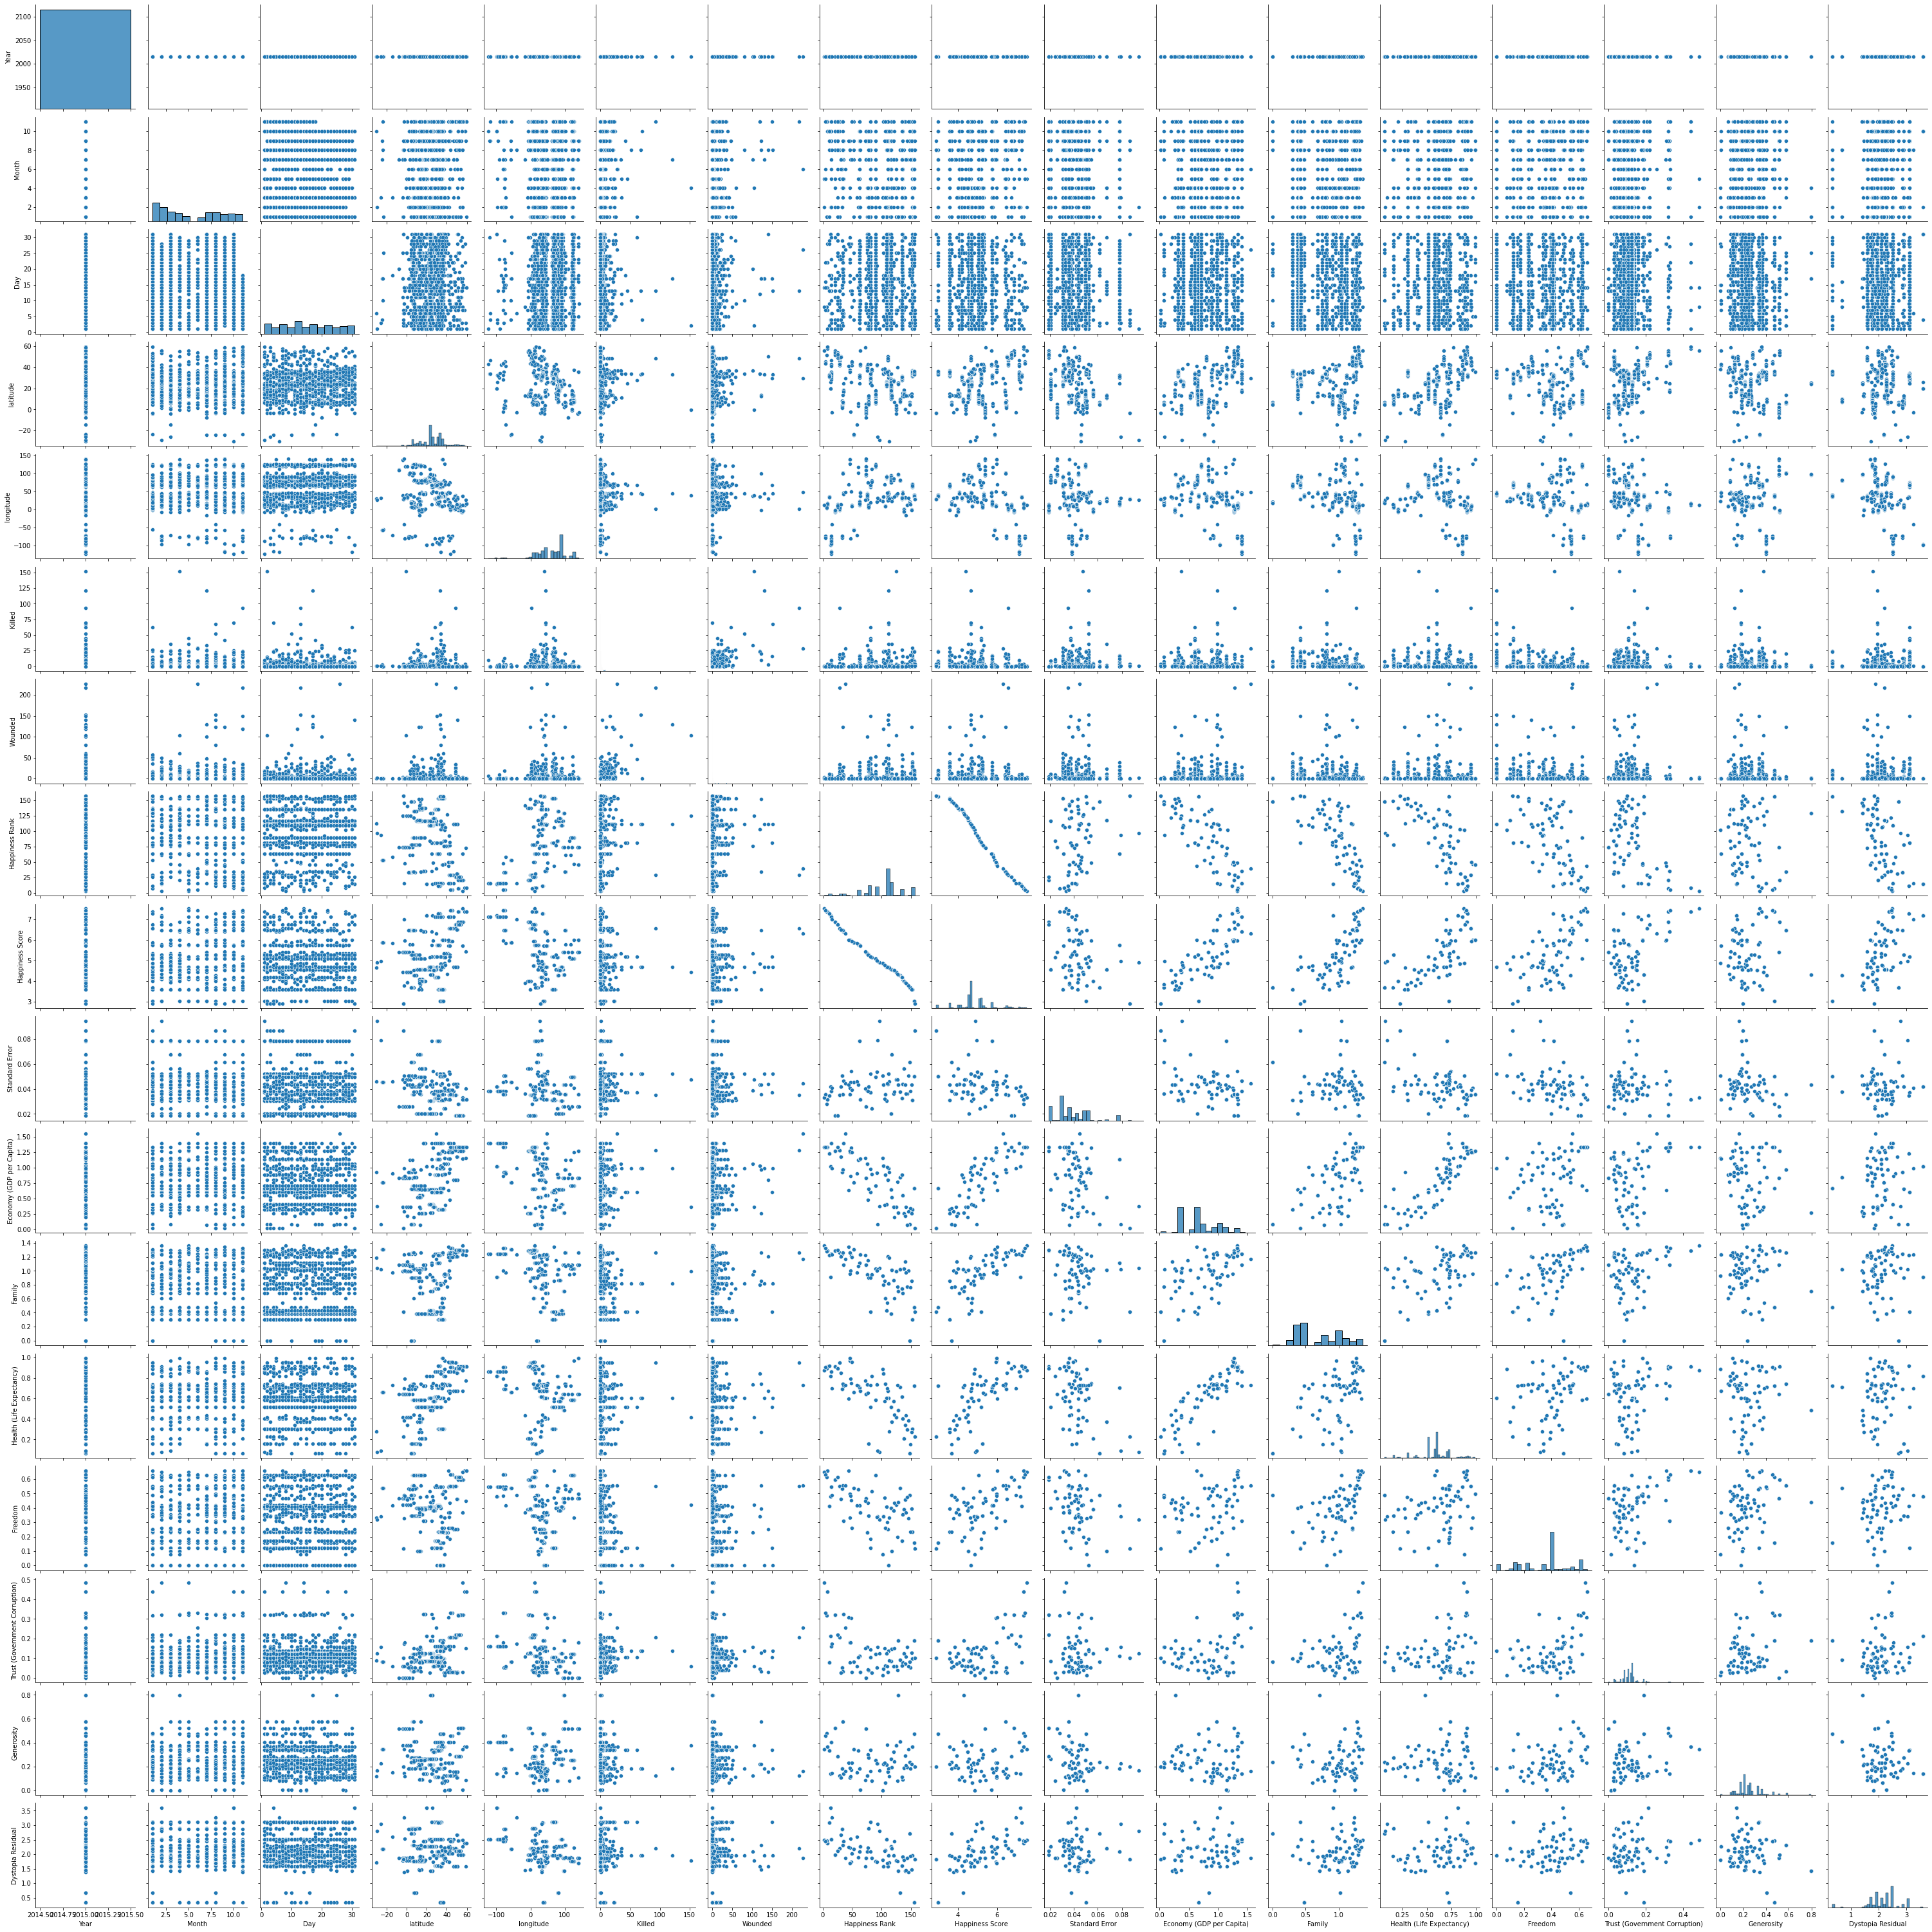

In [14]:
sb.pairplot(merge)
plt.savefig('plot.png')

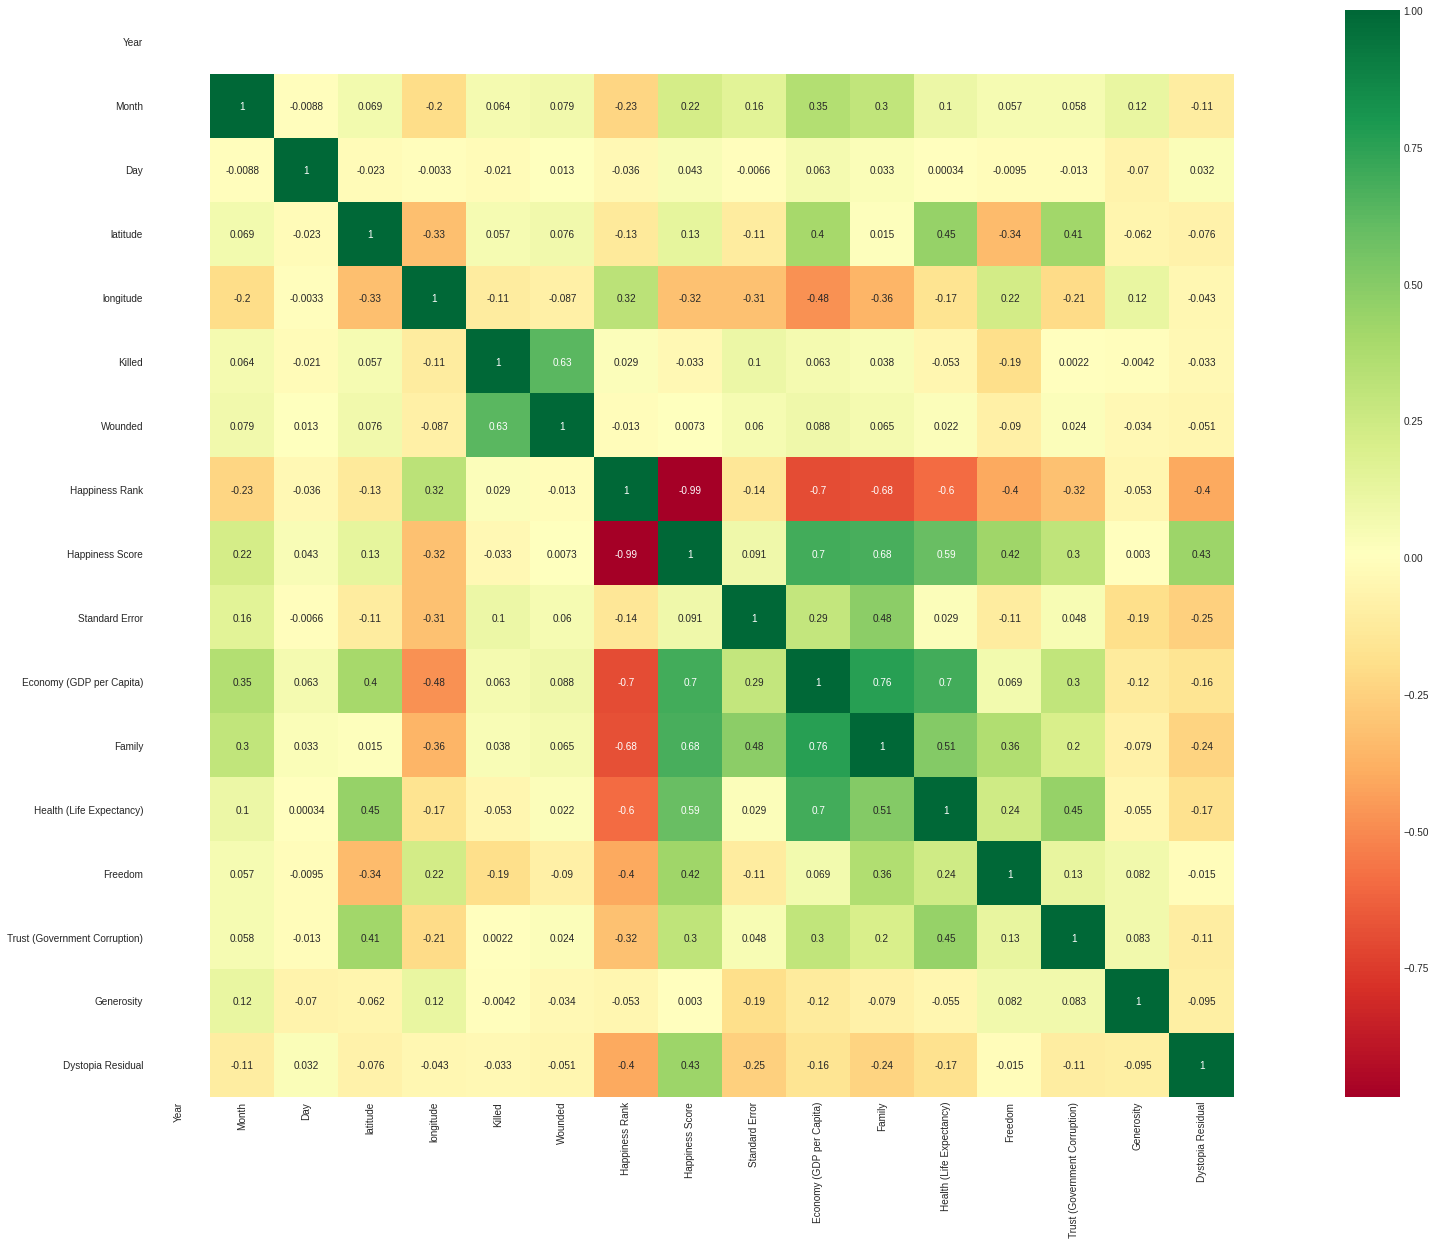

In [18]:
sb.heatmap(merge.corr(),annot=True, cmap='RdYlGn',square=True)

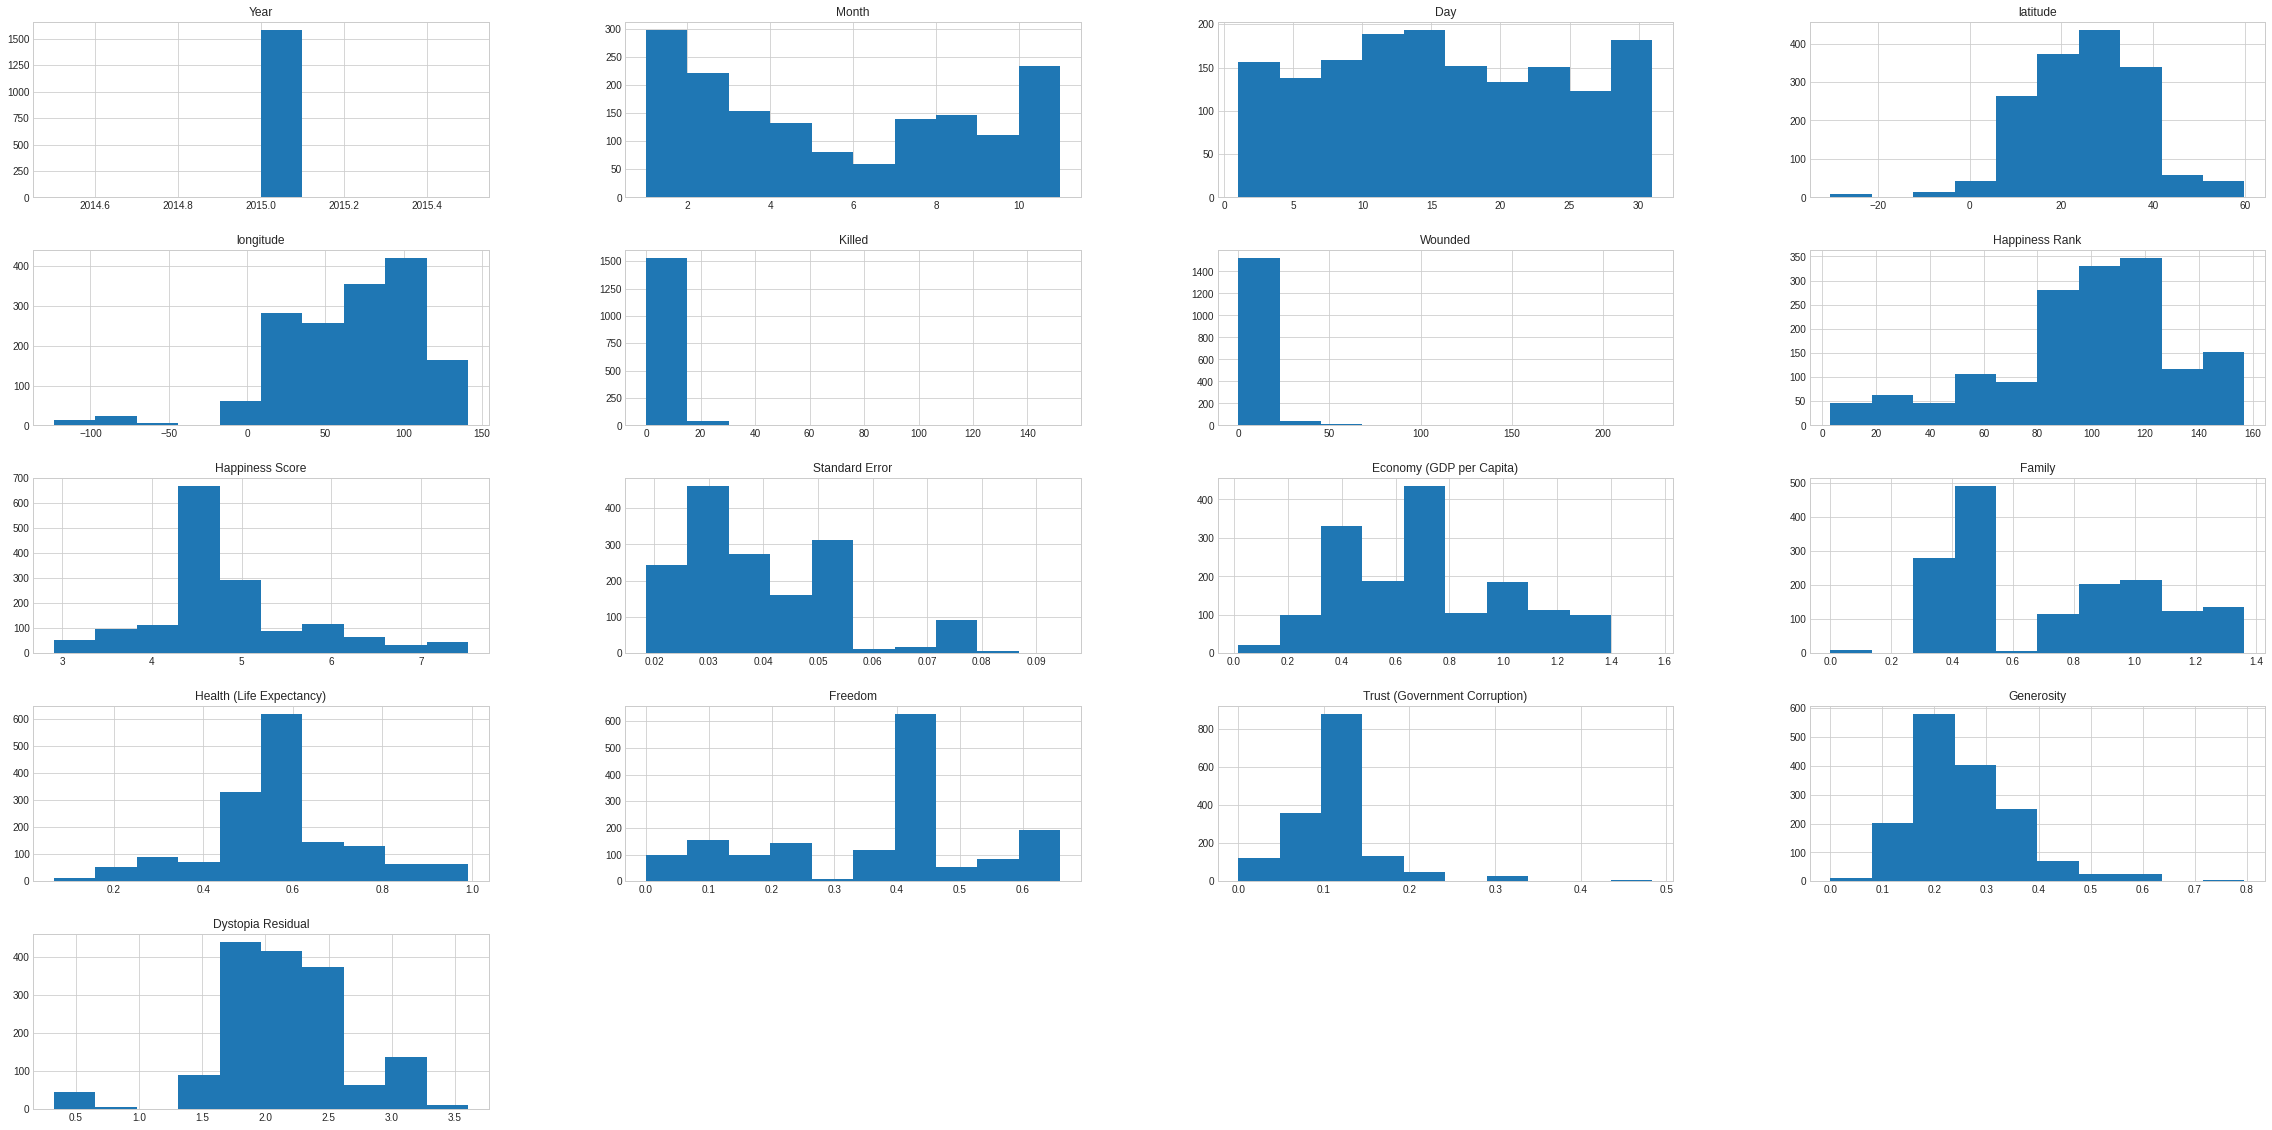

In [19]:
merge.hist()
plt.show()

Definizione delle Metriche

In [20]:
#oggetto che contiene le metriche
class Metrics1:
  #costruttore
  def __init__(self,precision,recall,accuracy,mcc):
    self.precision=precision
    self.recall=recall
    self.accuracy=accuracy
    self.mcc=mcc
  
  #ToString
  def __str__(self):
    return f'Metrics [precision= {self.precision} recall= {self.recall} accuracy= {self.accuracy} mcc= {self.mcc}'

In [21]:
import numpy as np
class MetricsResultContainer:
  meanPrecision = []
  meanRecall = []
  meanAccuracy = []
  meanMcc =[]
  #costruttore
  def __init__(self,model,alg,scaler,param,metricsMean,balance):
    self.model=model
    self.alg=alg
    self.scaler=scaler
    self.param=param
    self.metricsMean=metricsMean
    self.meanPrecision = []
    self.meanRecall = []
    self.meanAccuracy = []
    self.meanMcc =[]
    self.balance=balance
  
  def printMetrics(self):
    for m in self.metricsMean:
      self.meanPrecision.append(m.precision)
      self.meanRecall.append(m.recall)
      self.meanAccuracy.append(m.accuracy)
      self.meanMcc.append(m.mcc)
    print("meanPrecision=",np.mean(self.meanPrecision))    
    print("meanRecall=",np.mean(self.meanRecall))    
    print("meanAccuracy=",np.mean(self.meanAccuracy))
    print("meanMcc=",np.mean(self.meanMcc))